First 5 Rows:
          date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null 

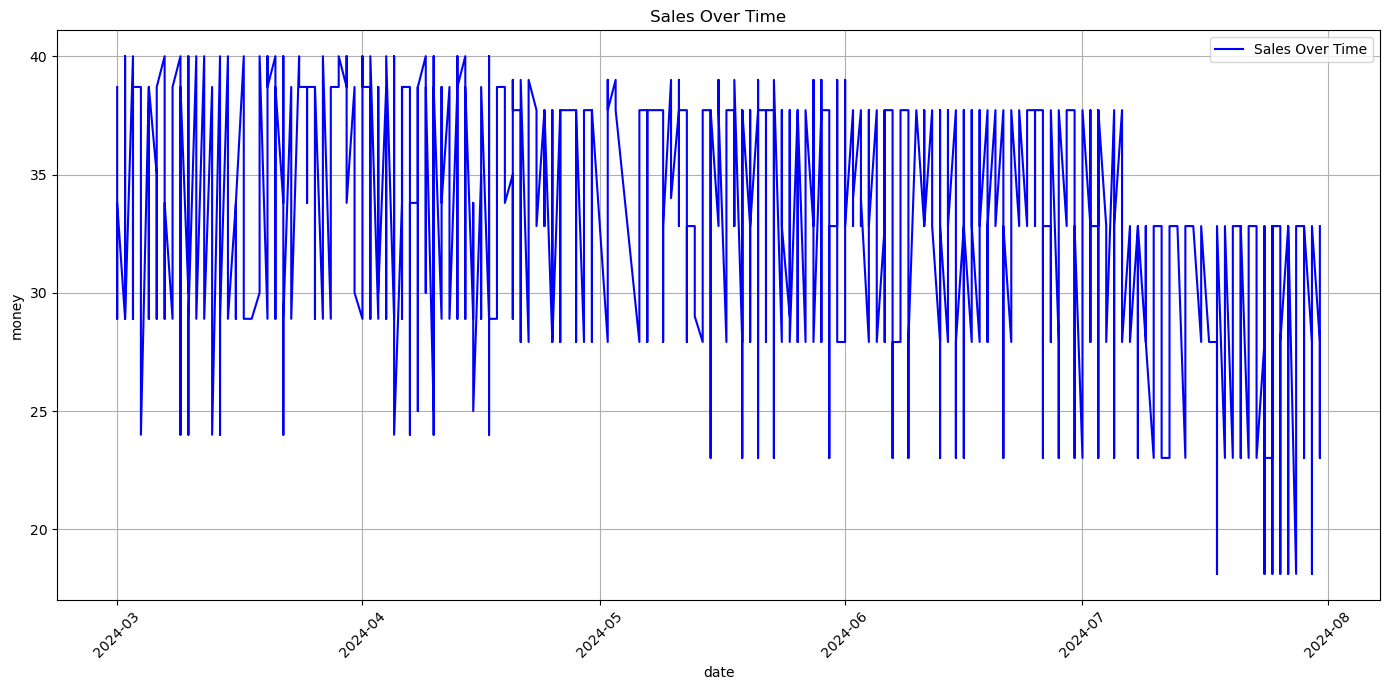

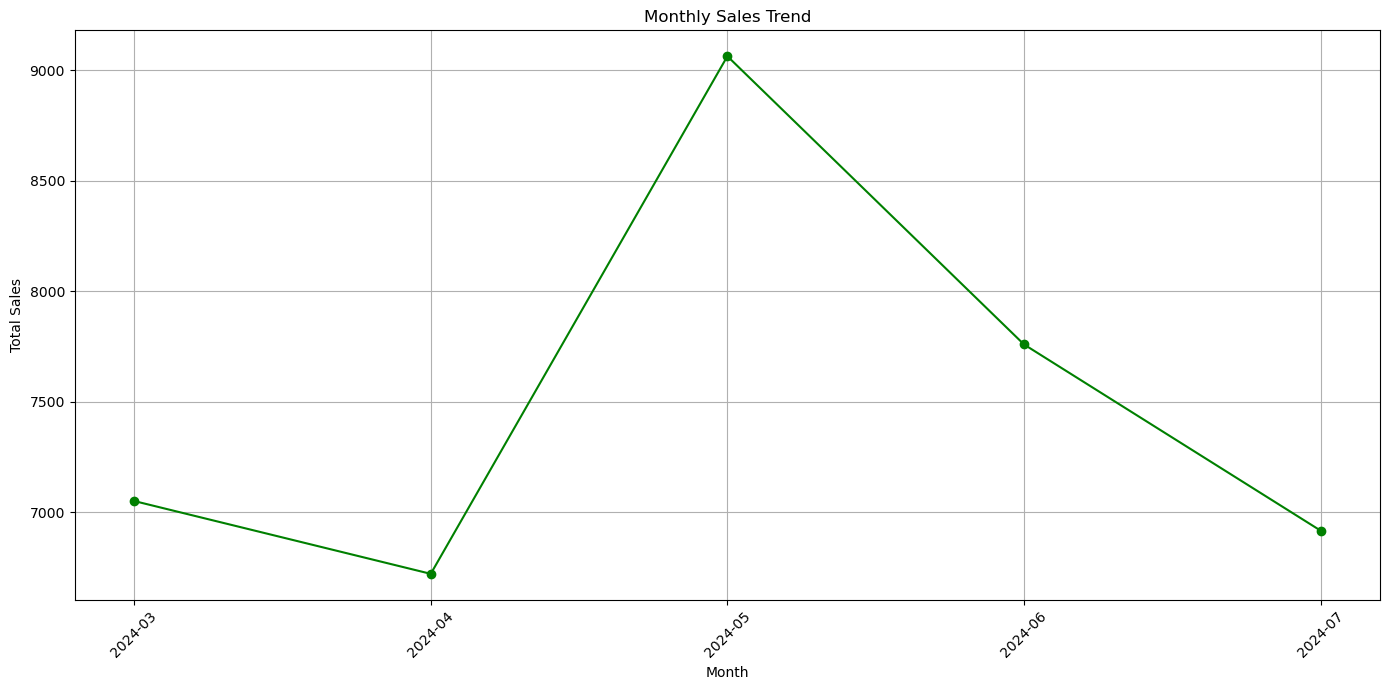

Mean Squared Error: 19.123095663245252
R2 Score: -0.027213714929041677


In [22]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
import seaborn as sns

warnings.filterwarnings("ignore", message="Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.")


# Load the dataset
data = pd.read_csv('index.csv')

# Initial Data Exploration
print("First 5 Rows:\n", data.head())
print("Data Info:\n", data.info())
print("Missing Values:\n", data.isnull().sum())

# Data Cleaning
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Fill missing values in 'sales' with the mean
data['money'].fillna(data['money'].mean(), inplace=True)


# Exploratory Data Analysis - Sales Over Time
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['money'], label='Sales Over Time', color='blue')
plt.title('Sales Over Time')
plt.xlabel('date')
plt.ylabel('money')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Time Series Analysis: Monthly Sales Trend
data['Month'] = data['date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['money'].sum()

plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# ML Model - Predicting Next Day Sales
# Prepare data for ML
data['day'] = data['date'].dt.day
X = data[['day']]
y = data['money']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Customer Sales Analysis:
 card
ANON-0000-0000-0001    646.14
ANON-0000-0000-0002     77.40
ANON-0000-0000-0003    651.96
ANON-0000-0000-0004    289.50
ANON-0000-0000-0005     33.80
Name: money, dtype: float64


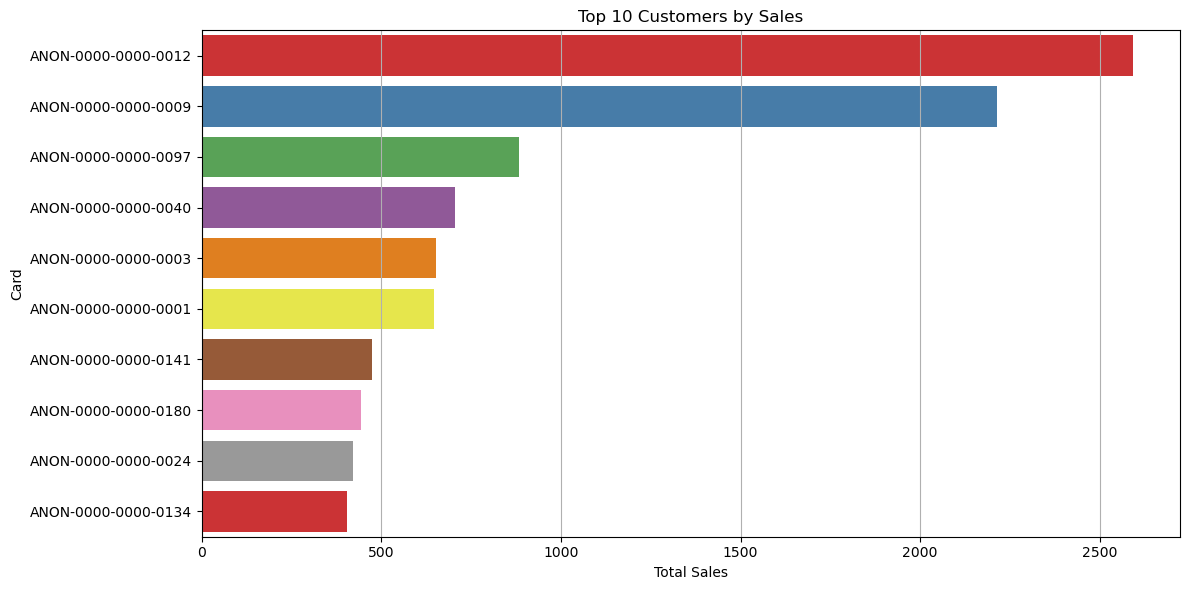

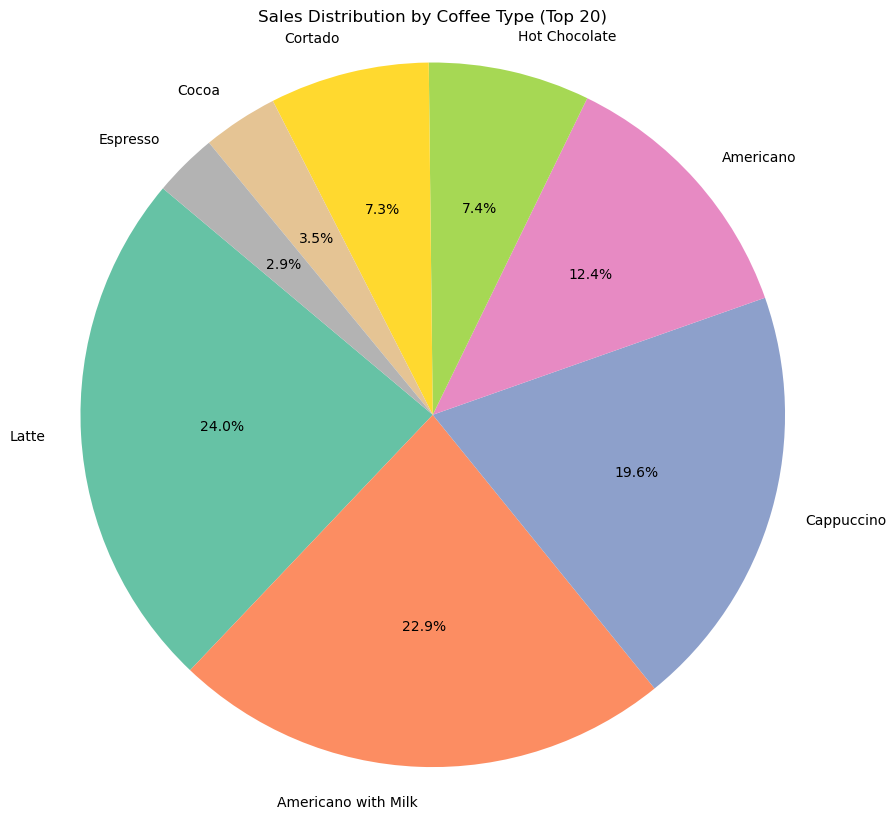

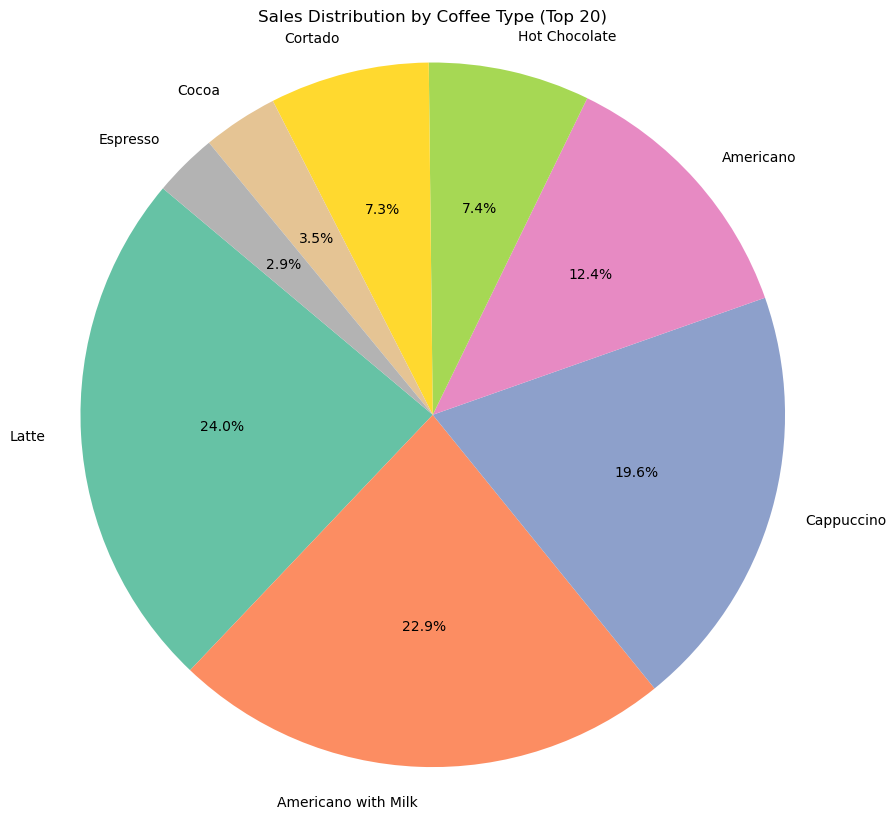

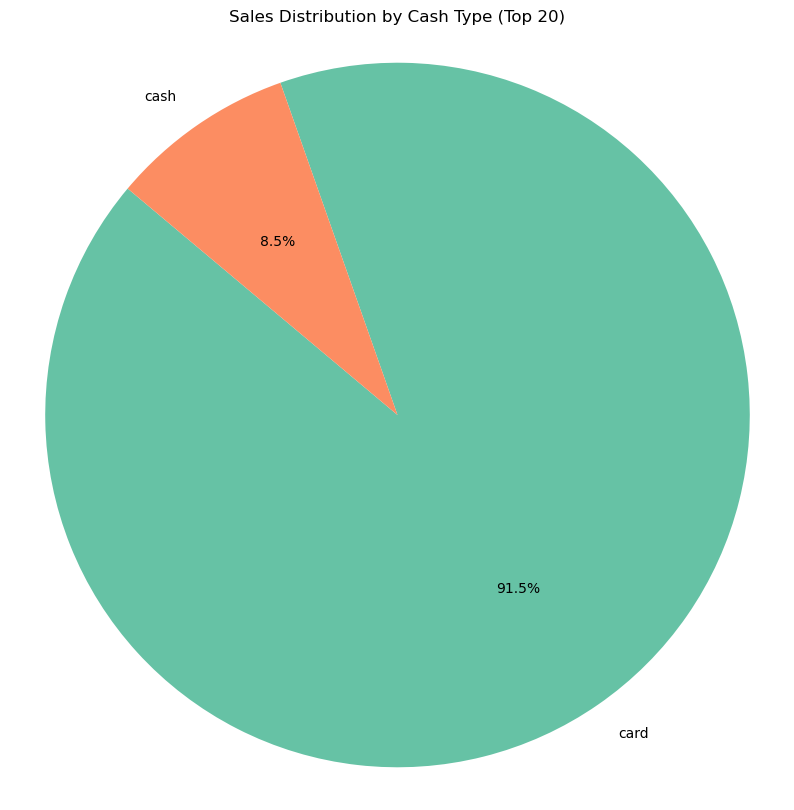

In [19]:
# Customer Purchase Analysis
customer_sales = data.groupby('card')['money'].sum()
print("Customer Sales Analysis:\n", customer_sales.head())

# Plot Top 10 Customers
top_10_customers = customer_sales.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_customers.values, y=top_10_customers.index, palette='Set1')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Card')
plt.grid(axis='x')
plt.tight_layout()
plt.show()
# Calculate total sales per coffee_name
coffee_sales = data.groupby('coffee_name')['money'].sum()

# Take top 20 coffee types by sales
top_20_coffee = coffee_sales.sort_values(ascending=False).head(20)
# Plot Pie Chart - Top 20 Coffee Types by Sales
plt.figure(figsize=(10, 10))
plt.pie(
    top_20_coffee, 
    labels=top_20_coffee.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('Set2', 20),
    startangle=140
)
plt.title('Sales Distribution by Coffee Type (Top 20)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()
# Calculate total sales per coffee_name
coffee_sales = data.groupby('coffee_name')['money'].sum()

# Take the top 20 coffee types by sales
top_20_coffee = coffee_sales.sort_values(ascending=False).head(20)

# Plot Pie Chart - Top 20 Coffee Types by Sales
plt.figure(figsize=(10, 10))
plt.pie(
    top_20_coffee, 
    labels=top_20_coffee.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('Set2', 20),
    startangle=140
)
plt.title('Sales Distribution by Coffee Type (Top 20)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()
cash_type_sales = data.groupby('cash_type')['money'].sum()
top_20_cash_types = cash_type_sales.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 10))
plt.pie(
    top_20_cash_types, 
    labels=top_20_cash_types.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('Set2', 20),
    startangle=140
)
plt.title('Sales Distribution by Cash Type (Top 20)')
plt.axis('equal')
plt.show()